In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as mysql

In [4]:
#.csv loader
def load_csv_data(path =  "notebook/datasets/DP_LIVE_21112022133845200.csv"):
    data = pd.read_csv(path)
    return data

In [12]:
def connect_table_to_df(table_name = "inflation_data"):
    try:
        mydb = mysql.connect(host="localhost", database = 'mydatabase',user="username", passwd="password")
        query = f"Select * from {table_name};"
        result_dataframe = pd.read_sql(query,mydb)
        mydb.close() #close the connection
        return result_dataframe
    except Exception as e:  
        mydb.close()
        print(str(e))

In [8]:
df = load_csv_data()
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,CAN,CPI,TOT,AGRWTH,M,2018-05,2.222222,NaN
1,CAN,CPI,TOT,AGRWTH,M,2018-06,2.453988,NaN
2,CAN,CPI,TOT,AGRWTH,M,2018-07,2.990798,NaN
3,CAN,CPI,TOT,AGRWTH,M,2018-08,2.835249,NaN
4,CAN,CPI,TOT,AGRWTH,M,2018-09,2.217125,NaN


In [19]:
#extract g-20 inflation data within relevant time interval
def get_location_data(data, loc = 'G-20'):
    new_data = data[data["LOCATION"] == loc]
    new_data = new_data[new_data["TIME"] <= "2021-08"]
    return new_data

In [36]:
#extract the relevant columns from inflation data
def extract_time_value(data):
    data['Value'] = data['Value'].astype(float)
    return data[["TIME", "Value"]].reset_index(drop = True)

In [46]:
#extract relevant time interval from commodity data and adjust month column to make it compatable with inflation data
def get_relevant_time(data):
    data[data.columns[1:]] = data[data.columns[1:]].astype(float)
    data = data[data["Month"] >= "2018-05-01"]
    data["Month"] = data["Month"].str[0:7]
    data = data.reset_index(drop = True)
    return data

In [22]:
def merge_datasets(g20_data, commodity_data):
     commodity_data.insert(loc = len(commodity_data.columns), column = "Value", value = g20_data["Value"].values)
     return commodity_data

In [23]:
#plot time vs inflation
def plot_time_vs_inflation_G20(data):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["Month"], data["Value"],"o-", label = "Inflation of G-20 countries")
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.title("Time_vs_InflationG20")
    plt.show()
    fig.savefig("notebook/plots/individual_time_vs_inflationG20/Time_vs_InflationG20")

In [24]:
#plot time vs chosen commodity price
def plot_time_vs_commodity_price(data, commodity):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["Month"], data[commodity], "o-",label = "Price of " + commodity)
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.title("Time_vs_Price_"+commodity)
    plt.show()
    fig.savefig("notebook/plots/individual_time_vs_commodity/Time_vs_Price_"+commodity)

In [61]:
def plot_time_vs_commdity_prices_all(data, columns = ['Crude_oil_avg', 'Nat_gas_index', 'Cocoa', 'Orange', 'Gold', 'Sugar_world','Beef', 'Barley']):
    for c in columns:
        plot_time_vs_commodity_price(data, c)
    plt.show()

In [62]:
def plot_commodity_prices_together(data, columns = ['Crude_oil_avg', 'Nat_gas_index', 'Cocoa', 'Orange', 'Gold', 'Sugar_world','Beef', 'Barley']):
    fig = plt.figure(figsize=(20,5))
    for c in columns:
        plt.plot(data["Month"], data[c], label = "Price of " + c)
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
    plt.yscale("log")
    plt.title("Time vs Price")
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/commodity_prices_together")

In [63]:
def plot_pct_change(data, columns = ['Crude_oil_avg', 'Nat_gas_index', 'Cocoa', 'Orange', 'Gold', 'Sugar_world','Beef', 'Barley', 'Value']):
    fig = plt.figure(figsize=(20,5))
    pct_change = data[columns].pct_change()
    alphas = np.linspace(0.2, 1, num = len(columns))
    i = 0
    for c in columns:
        if c == 'Value':
            plt.plot(data["Month"], pct_change[c],label = "Pct change of Inflation Value", alpha = alphas[i])
        else:
            plt.plot(data["Month"], pct_change[c],label = "Pct change of " + c, alpha = alphas[i])
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
        i = i+1
    plt.title("Time vs Pct changes")
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/pct_changes_together")

In [64]:
def plot_value_vs_commodity(data, commodity):
    fig = plt.figure(figsize=(20,5))
    cols = ["Value", commodity]
    pct_change = data[cols].pct_change()
    for c in cols:
        if c == 'Value':
            plt.plot(data["Month"], pct_change[c], "o-", label = "Pct change of Inflation Value" )
        else:
            plt.plot(data["Month"], pct_change[c], "o-", label = "Pct change of " + c)
        plt.xticks(rotation = 45)
        plt.legend(loc = 'upper right')
    plt.title("Time vs Pct change of InflatonG20 and " + commodity)
    plt.show()
    fig.savefig("notebook/plots/commodity_comparison/pct_change_inflation_and_" + commodity)

In [65]:
def plot_value_vs_commodities(data, columns = ['Crude_oil_avg', 'Nat_gas_index', 'Cocoa', 'Orange', 'Gold', 'Sugar_world','Beef', 'Barley']):
    for c in columns:
        plot_value_vs_commodity(data, c)

In [66]:
#inflation_data
inflation_data = connect_table_to_df("inflation_data")

In [67]:
#commodities price data
commodity_data = connect_table_to_df("commodity_data")

In [68]:
g20_data = get_location_data(inflation_data)
g20_data = extract_time_value(g20_data)
commodity_data = get_relevant_time(commodity_data)
data_all = merge_datasets(g20_data, commodity_data)
commodities = list(commodity_data.columns)[1:]
#commodities = ['Crude oil, average', 'Natural gas index', 'Cocoa', 'Orange', 'Gold', 'Sugar, world', 'Beef', 'Barley']

/var/folders/g0/k_xjcsrs43z8hgdqtfw4n4gm0000gn/T/ipykernel_34625/1343121623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].str[0:7]


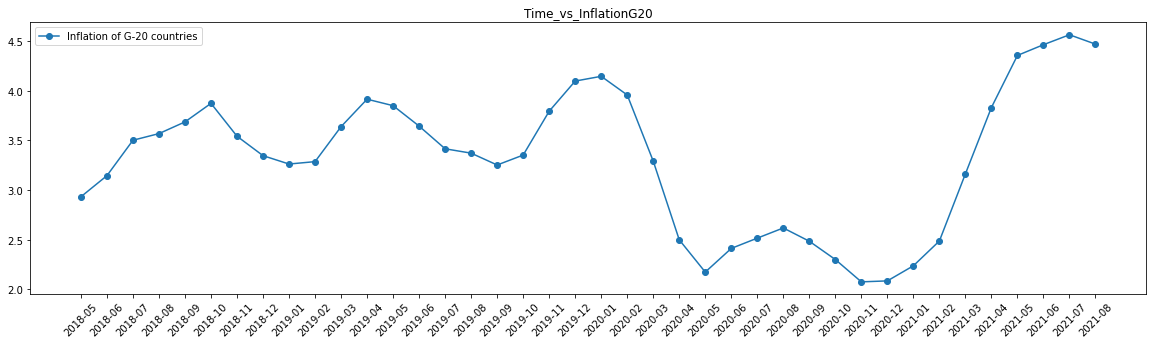

In [69]:
plot_time_vs_inflation_G20(data_all)

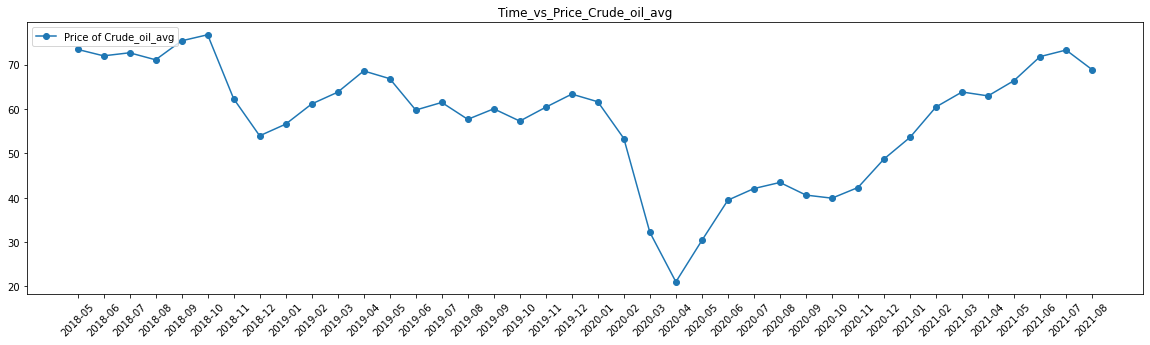

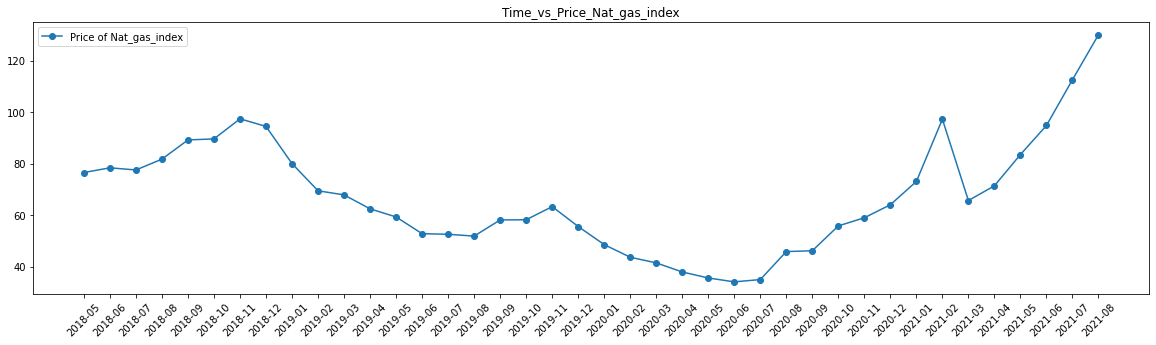

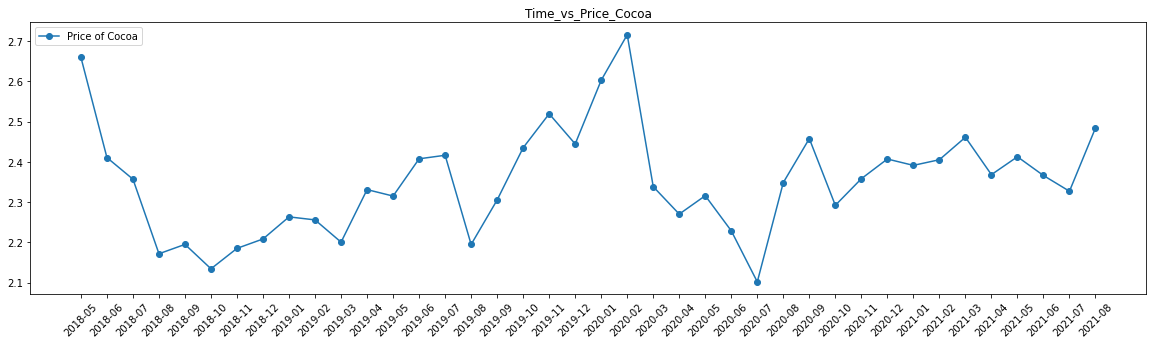

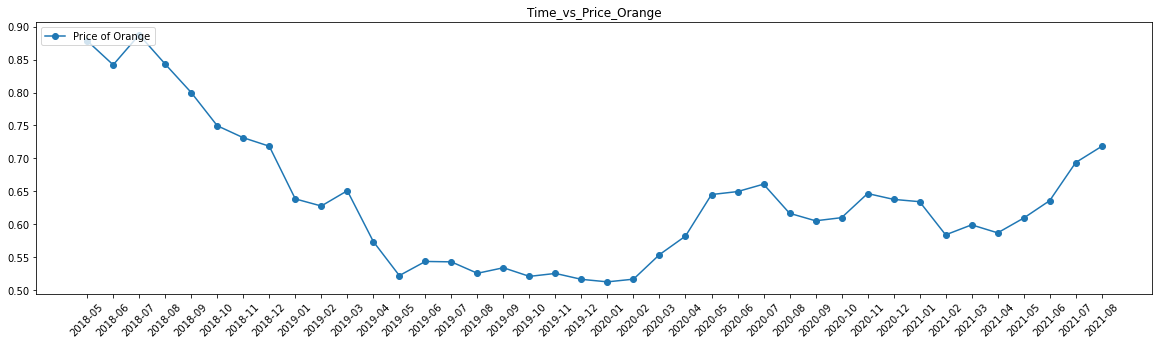

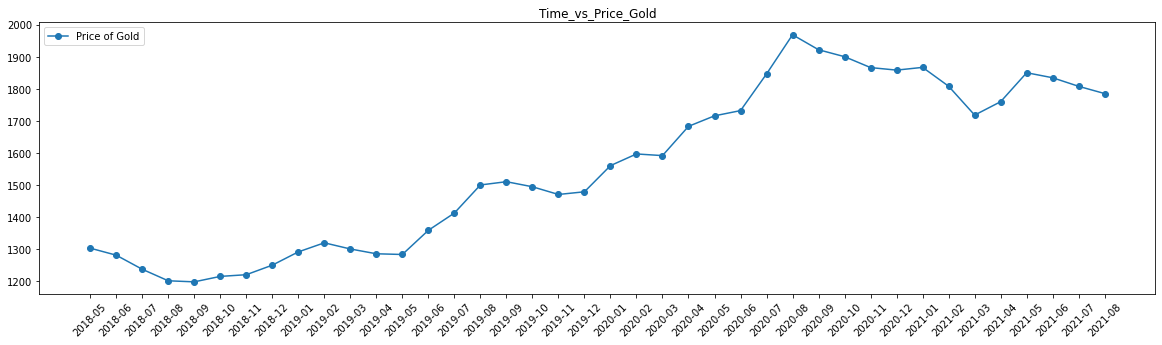

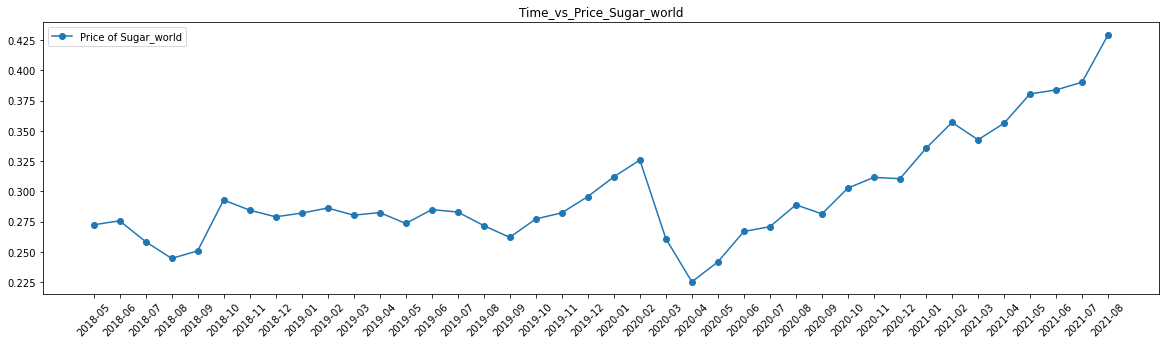

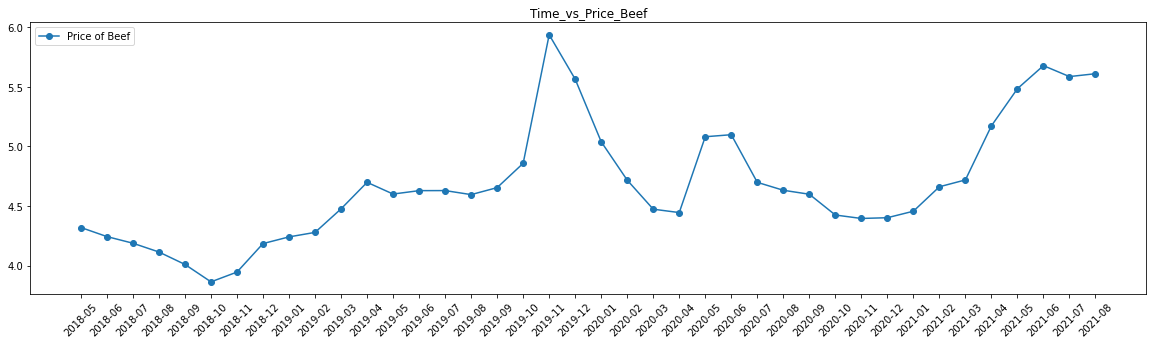

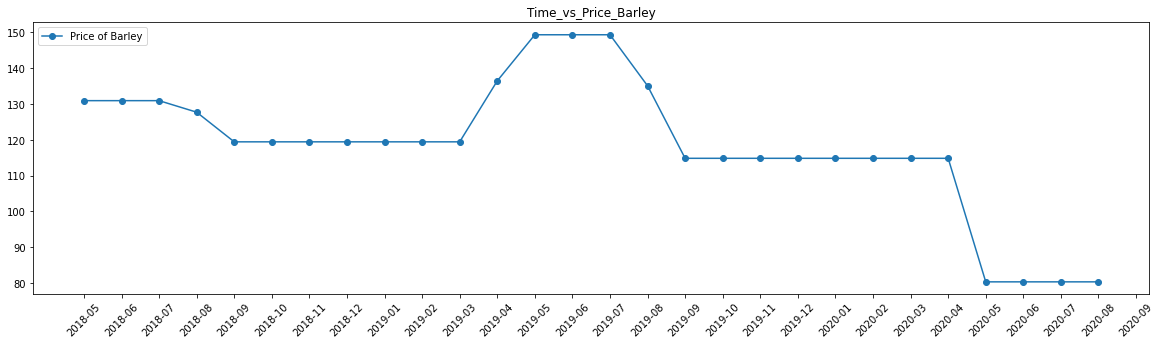

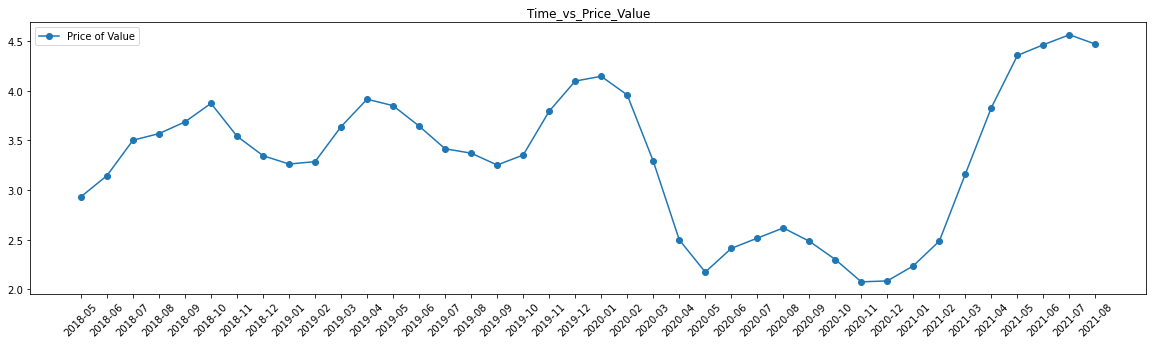

In [70]:
plot_time_vs_commdity_prices_all(data_all, commodities)

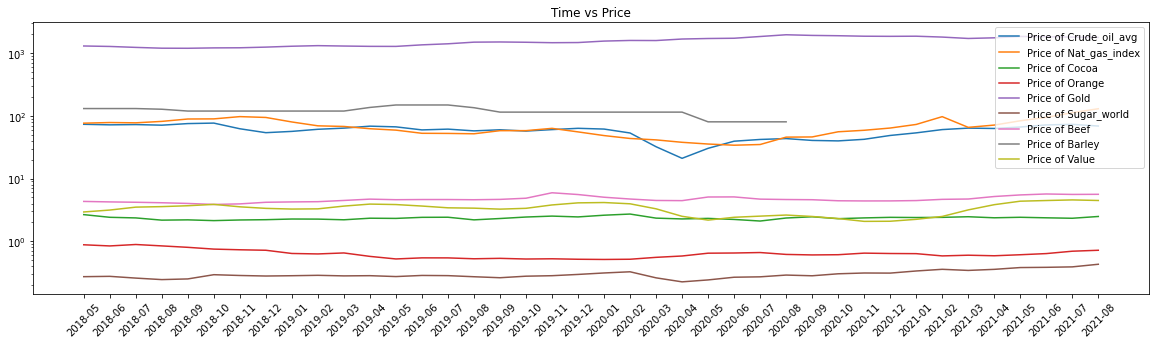

In [71]:
plot_commodity_prices_together(data_all, commodities)

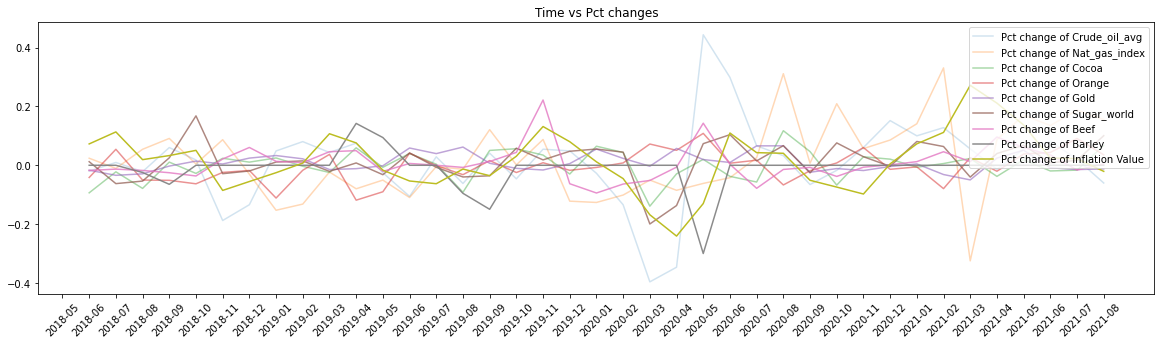

In [72]:
plot_pct_change(data_all)

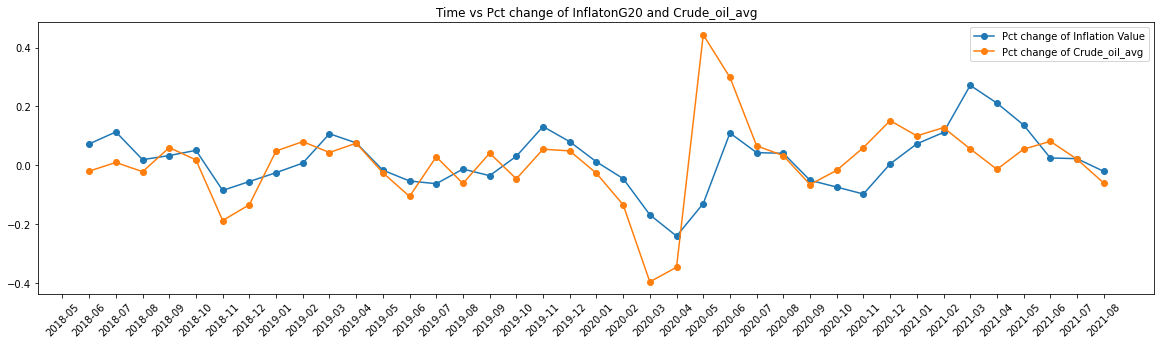

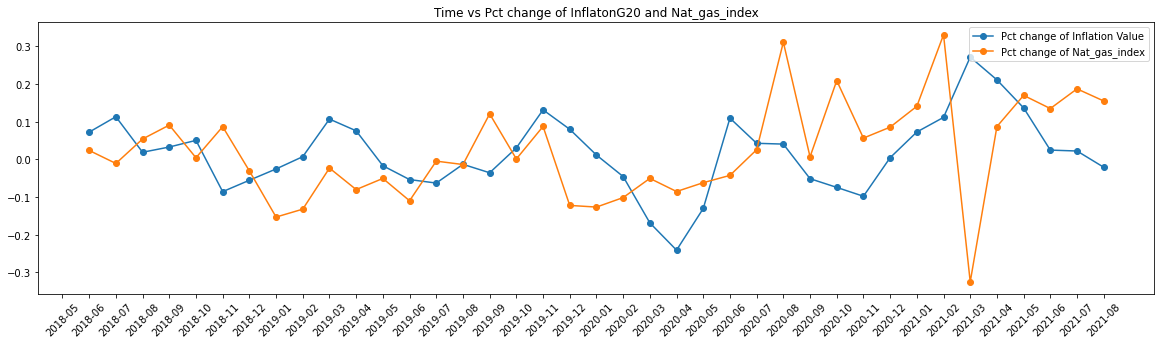

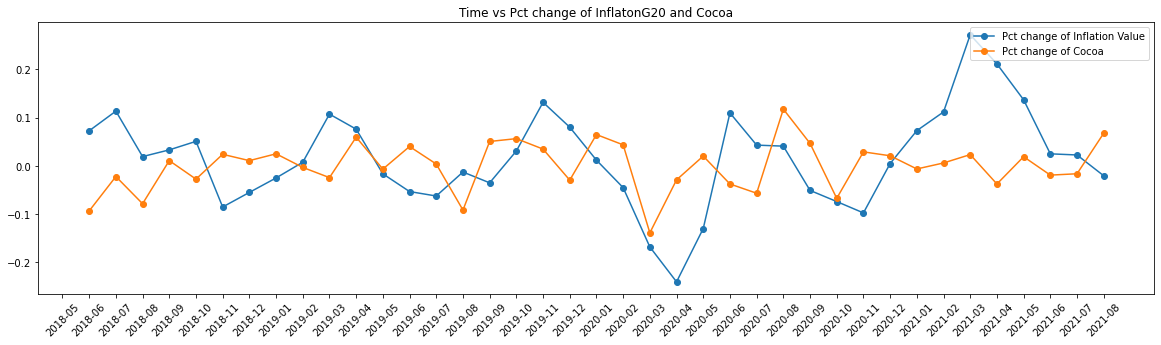

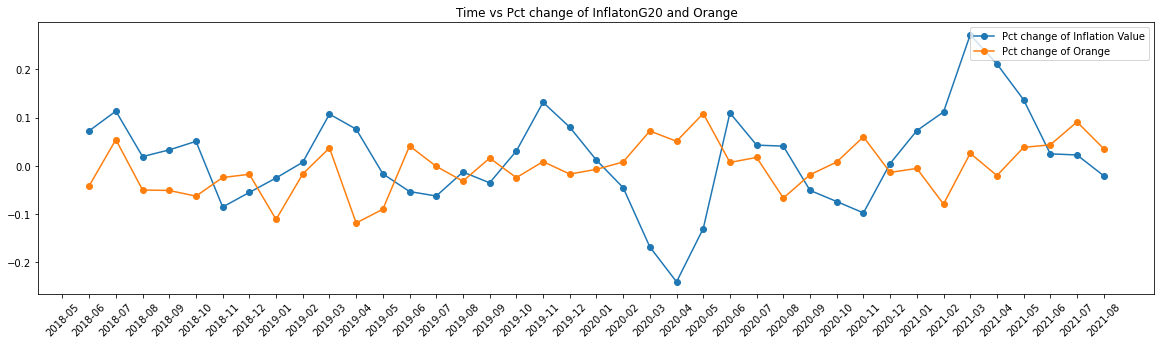

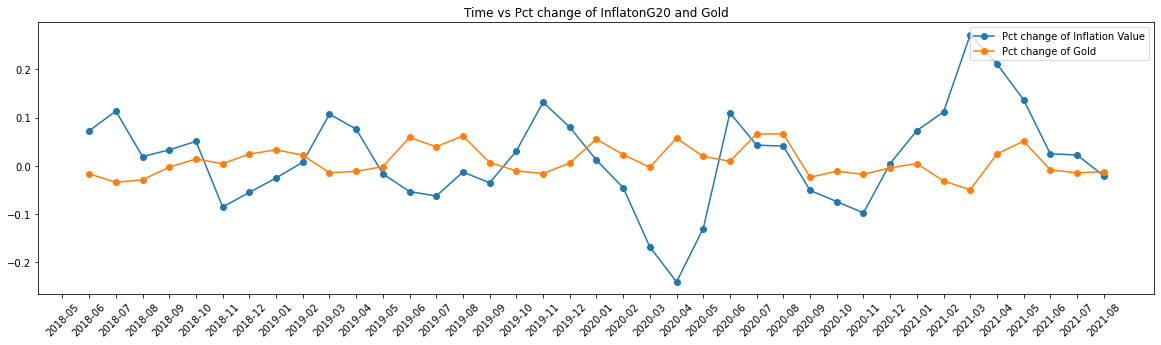

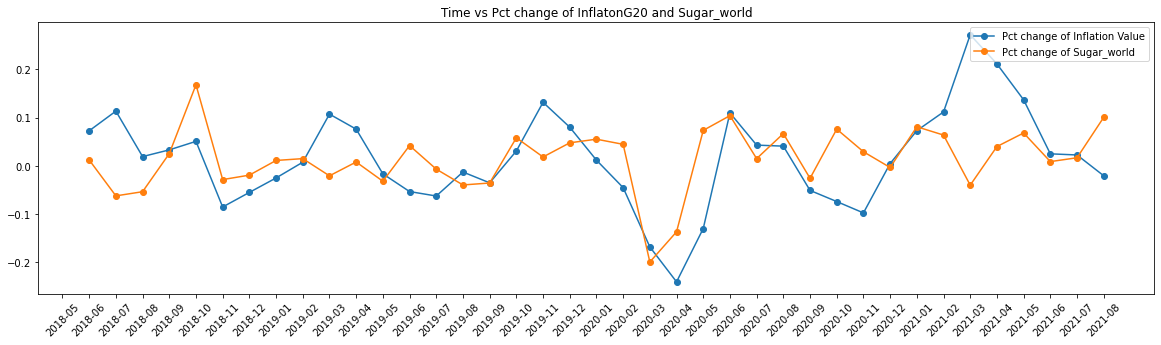

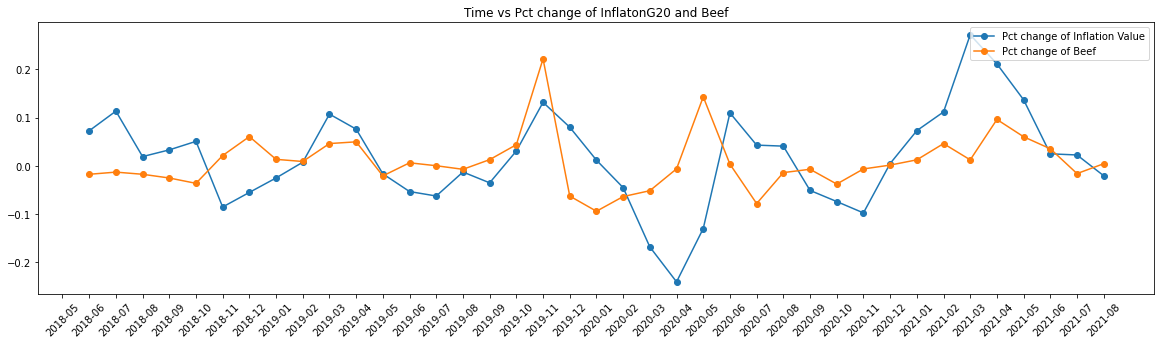

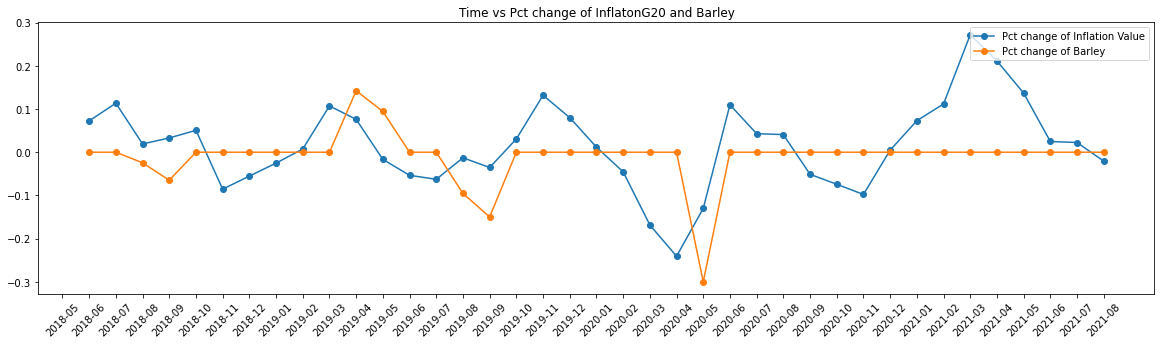

In [73]:
plot_value_vs_commodities(data_all)